# Simple Auto Encoder
reference from https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
# encoder with L1 activity regularizer
# encoded = Dense(encoding_dim, activation='relu',
#               activity_regularizer=regularizers.l1(10e-5))(input_img)
# TODO: understanding why regularizer is not work well as the reference
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [2]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [3]:
from keras.datasets import mnist
import numpy as np

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))
print X_train.shape
print X_test.shape

(60000, 784)
(10000, 784)


In [4]:
autoencoder.compile(
    optimizer='adadelta',
    loss='binary_crossentropy'
)
autoencoder.fit(
    X_train,
    X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test)
)
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 0.3675 - val_loss: 0.2718
Epoch 2/50
60000/60000 [==============================] - 3s - loss: 0.2635 - val_loss: 0.2522
Epoch 3/50
60000/60000 [==============================] - 3s - loss: 0.2421 - val_loss: 0.2304
Epoch 4/50
60000/60000 [==============================] - 3s - loss: 0.2221 - val_loss: 0.2118
Epoch 5/50
60000/60000 [==============================] - 3s - loss: 0.2062 - val_loss: 0.1984
Epoch 6/50
60000/60000 [==============================] - 3s - loss: 0.1950 - val_loss: 0.1892
Epoch 7/50
60000/60000 [==============================] - 3s - loss: 0.1868 - val_loss: 0.1816
Epoch 8/50
60000/60000 [==============================] - 3s - loss: 0.1798 - val_loss: 0.1751
Epoch 9/50
60000/60000 [==============================] - 3s - loss: 0.1736 - val_loss: 0.1692
Epoch 10/50
60000/60000 [==============================] - 3s - loss: 0.1681 - val_loss: 0.1640

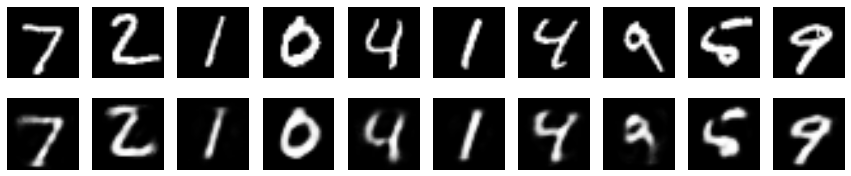

7.79927


In [5]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(15, 3))
for i in xrange(n):
    # display original 
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print encoded_imgs.mean()

# Deep Auto Encoder

In [6]:
encoding_dim2 = 32

input_img2 = Input(shape=(784,))
encoded2 = Dense(128, activation='relu')(input_img2)
encoded2 = Dense(64, activation='relu')(encoded2)
encoded2 = Dense(32, activation='relu')(encoded2)
decoded2 = Dense(64, activation='relu')(encoded2)
decoded2 = Dense(128, activation='relu')(decoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded2)
autoencoder2 = Model(input_img2, decoded2)

encoder2 = Model(input_img2, encoded2)
encoded_input2 = Input(shape=(encoding_dim2,))
decoder_layer2_784 = autoencoder2.layers[-1]
decoder_layer2_128 = autoencoder2.layers[-2]
decoder_layer2_64 = autoencoder2.layers[-3]
decoder2 = Model(encoded_input2, decoder_layer2_784(decoder_layer2_128(decoder_layer2_64(encoded_input2))))

In [7]:
autoencoder2.compile(
    optimizer='adadelta',
    loss='binary_crossentropy'
)
autoencoder2.fit(
    X_train,
    X_train,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test)
)
encoded_imgs2 = encoder2.predict(X_test)
decoded_imgs2 = decoder2.predict(encoded_imgs2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s - loss: 0.3521 - val_loss: 0.2637
Epoch 2/100
60000/60000 [==============================] - 5s - loss: 0.2595 - val_loss: 0.2555
Epoch 3/100
60000/60000 [==============================] - 5s - loss: 0.2504 - val_loss: 0.2442
Epoch 4/100
60000/60000 [==============================] - 5s - loss: 0.2412 - val_loss: 0.2373
Epoch 5/100
60000/60000 [==============================] - 5s - loss: 0.2316 - val_loss: 0.2235
Epoch 6/100
60000/60000 [==============================] - 5s - loss: 0.2184 - val_loss: 0.2124
Epoch 7/100
60000/60000 [==============================] - 5s - loss: 0.2062 - val_loss: 0.1999
Epoch 8/100
60000/60000 [==============================] - 5s - loss: 0.1977 - val_loss: 0.1928
Epoch 9/100
60000/60000 [==============================] - 5s - loss: 0.1893 - val_loss: 0.1825
Epoch 10/100
60000/60000 [==============================] - 5s - loss: 0.1815 - val_lo

60000/60000 [==============================] - 5s - loss: 0.1060 - val_loss: 0.1041
Epoch 85/100
60000/60000 [==============================] - 5s - loss: 0.1058 - val_loss: 0.1045
Epoch 86/100
60000/60000 [==============================] - 5s - loss: 0.1056 - val_loss: 0.1047
Epoch 87/100
60000/60000 [==============================] - 5s - loss: 0.1054 - val_loss: 0.1046
Epoch 88/100
60000/60000 [==============================] - 5s - loss: 0.1051 - val_loss: 0.1044
Epoch 89/100
60000/60000 [==============================] - 5s - loss: 0.1049 - val_loss: 0.1046
Epoch 90/100
60000/60000 [==============================] - 5s - loss: 0.1048 - val_loss: 0.1033
Epoch 91/100
60000/60000 [==============================] - 5s - loss: 0.1045 - val_loss: 0.1048
Epoch 92/100
60000/60000 [==============================] - 5s - loss: 0.1044 - val_loss: 0.1030
Epoch 93/100
60000/60000 [==============================] - 5s - loss: 0.1042 - val_loss: 0.1034
Epoch 94/100
60000/60000 [=================

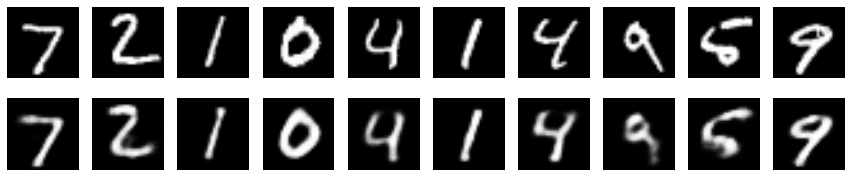

6.93814


In [8]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(15, 3))
for i in xrange(n):
    # display original 
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print encoded_imgs2.mean()

# Variational Auto Encoder
1. http://kvfrans.com/variational-autoencoders-explained/
2. https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained

In [9]:
from keras.layers import Input, Dense, Lambda, Layer
from keras.models import Model
from keras import metrics
from keras import backend as K

batch_size = 256
original_dim = 784
intermediate_dim = 256
latent_dim = 2

# create model
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(
        shape=(K.shape(z_mean)[0], latent_dim),
        mean=0.,
        stddev=1.
    )
    return z_mean + K.exp(z_log_sigma / 2) * epsilon
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# compile model
class KLDivergenceLayer(Layer):
    def __init__(self, **kwargs):
        self.is_placeholder = True
        super(KLDivergenceLayer, self).__init__(**kwargs)
    
    def vae_loss(self, x, x_decoded_mean):
        xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
        kl_loss = -0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
        return K.mean(xent_loss + kl_loss)
        
    def call(self, inputs):
        x = inputs[0]
        x_decoded_mean = inputs[1]
        loss = self.vae_loss(x, x_decoded_mean)
        self.add_loss(loss, inputs=inputs)
        return x
loss_estimator = KLDivergenceLayer()([x, x_decoded_mean])
vae = Model(x, loss_estimator)
vae.compile(optimizer='rmsprop', loss=None)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:50: UserWarning: Output "kl_divergence_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "kl_divergence_layer_1" during training.


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s - loss: 207.9806 - val_loss: 180.1440
Epoch 2/100
60000/60000 [==============================] - 6s - loss: 174.8806 - val_loss: 171.5281
Epoch 3/100
60000/60000 [==============================] - 6s - loss: 170.3882 - val_loss: 170.2549
Epoch 4/100
60000/60000 [==============================] - 6s - loss: 168.1823 - val_loss: 167.5097
Epoch 5/100
60000/60000 [==============================] - 6s - loss: 166.3986 - val_loss: 165.8440
Epoch 6/100
60000/60000 [==============================] - 6s - loss: 164.8331 - val_loss: 164.5703
Epoch 7/100
60000/60000 [==============================] - 6s - loss: 163.4508 - val_loss: 163.4923
Epoch 8/100
60000/60000 [==============================] - 6s - loss: 162.2470 - val_loss: 162.2745
Epoch 9/100
60000/60000 [==============================] - 6s - loss: 161.1949 - val_loss: 161.1400
Epoch 10/100
60000/60000 [========================

60000/60000 [==============================] - 6s - loss: 149.5005 - val_loss: 154.2992
Epoch 82/100
60000/60000 [==============================] - 6s - loss: 149.4552 - val_loss: 153.2614
Epoch 83/100
60000/60000 [==============================] - 6s - loss: 149.4490 - val_loss: 152.7503
Epoch 84/100
60000/60000 [==============================] - 6s - loss: 149.3532 - val_loss: 152.5769
Epoch 85/100
60000/60000 [==============================] - 6s - loss: 149.3167 - val_loss: 152.4659
Epoch 86/100
60000/60000 [==============================] - 6s - loss: 149.2954 - val_loss: 152.9690
Epoch 87/100
60000/60000 [==============================] - 6s - loss: 149.2330 - val_loss: 152.3980
Epoch 88/100
60000/60000 [==============================] - 6s - loss: 149.2073 - val_loss: 152.5107
Epoch 89/100
60000/60000 [==============================] - 6s - loss: 149.1549 - val_loss: 153.5105
Epoch 90/100
60000/60000 [==============================] - 6s - loss: 149.1104 - val_loss: 153.6092
Epo

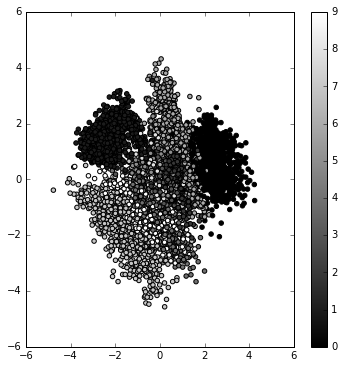

In [10]:
# training model
(X_train, _), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
vae.fit(
    X_train,
    shuffle=True,
    epochs=100,
    batch_size=batch_size,
    validation_data=(X_test, None)
)

# display latent space
encoder = Model(x, z_mean)
X_test_encoded = encoder.predict(X_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(
    X_test_encoded[:, 0],
    X_test_encoded[:, 1],
    c=y_test
)
plt.colorbar()
plt.show()

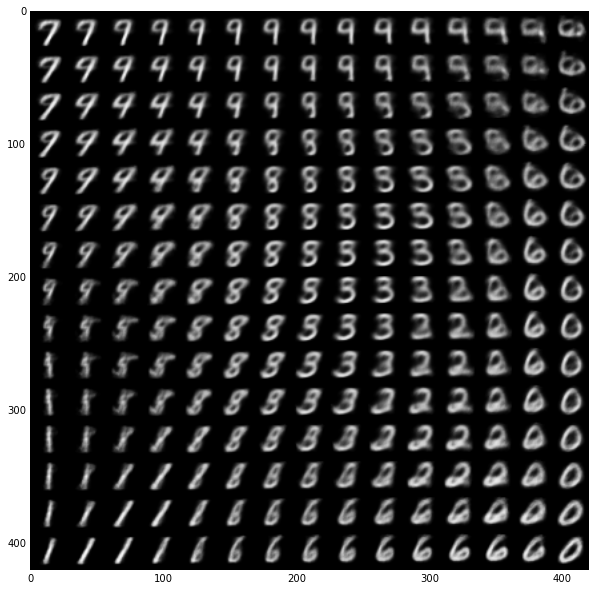

In [12]:
from scipy.stats import norm

# build generator from the trained model
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

# display digits
n = 15
digit_size = 28
figure = np.zeros([digit_size*n, digit_size*n])
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i*digit_size: (i+1)*digit_size, 
               j*digit_size: (j+1)*digit_size] = digit
plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()